# Experimental Control of 3 Chip Project

## Prequisites

In [1]:
#run this cell if you want to be able to autoreload packages
#(meaning that you don't have to restart the kernal when you make changes to code)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%run -i "prerequisites.py"

## Skip if Using Power Monitor NoteBook

In [ ]:
# powermeter1 = Powermeter('PM100USB', serial='P2003916', unit='dBm', wavelength=1550) 
unit='dBm'
wavelength=1550
#Alice (tele) powermeters 10/03/20:
PMa = PM('PM100USB', serial='P2007347',unit=unit, wavelength = wavelength)
PMb = PM('PM100USB', serial='P2010371',unit=unit, wavelength = wavelength) 
PMc = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength) 
PMd = PM('PM100USB', serial='P2008115',unit=unit, wavelength = wavelength)
#Charlie powermeters 10/03/20:
PMe = PM('PM100USB', serial='P2005653',unit=unit, wavelength = wavelength)
PMf = PM('PM100USB', serial='P2010372',unit=unit, wavelength = wavelength) 
PMg = PM('PM100USB', serial='P2008116',unit=unit, wavelength = wavelength) 
PMh = PM('PM100USB', serial='P2007346',unit=unit, wavelength = wavelength)

PMi = PM('PM100USB', serial='P2008979',unit=unit, wavelength = wavelength)
PMj = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength)

PM_idler = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd}
PM_signal = {"PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}
PM_all = {"PMa":PMa,"PMb":PMb, "PMc":PMc,"PMd":PMd, "PMe":PMe,"PMf":PMf, "PMg":PMg,"PMh":PMh}

In [ ]:
PMi = PM('PM100USB', serial='P2008979',unit=unit, wavelength = wavelength)
PMj = PM('PM100USB', serial='P2003683',unit=unit, wavelength = wavelength)

### Laser

In [2]:
# Wavelengths
p_wavelength = 1549.3
i_wavelength = 1558.98
s_wavelength = 1539.77

unit='dBm'
serial_port_name = 'COM13'
mytunics = tunics(serial_port_name = serial_port_name, unit=unit)


Connected to Tunics laser on serial port COM13



In [3]:
# Laser Settings
mytunics.laser_wavelength(p_wavelength)
mytunics.laser_switch('on') 
mytunics.laser_power(3) 

In [11]:
mytunics.laser_switch('off')

# Ring Calibration

### Ring Settings Configuration

In [ ]:
## Settings for the calibrations Choosing voltage range, power meter and the ring for allow for chip configuration
PMs = {"MRR1":PMa, "MRR2":PMb, "MRR3":PMc, "MRR4":PMd}
wavelength_range = np.arange(1539.77,1558.98,0.01)

In [4]:
# Read in Ring Volts
df = pd.read_csv("Ring_Coulping_Voltage.csv")
Ring_Volts = df.to_dict('r')[0]

In [5]:
Ring_Volts

{'MRR1': 0.19, 'MRR2': 0.83, 'MRR3': 0.99, 'MRR4': 1.295}

### Ring Cal Function

In [91]:
def Ring_Cal(voltage_range, ring, PM):
    power_measurements = []
    for voltage in tqdm(voltage_range):
        h.set_voltage(ring,voltage)
        time.sleep(0.2)
        power_measurements.append(PM.measure())
    plt.plot(voltage_range, power_measurements, marker = "x", linestyle=None)
    plt.xlabel("Voltage (V)")
    plt.ylabel("Power (dB/m)")
    plt.title(ring)
    plt.show()
    dictionary = dict(zip(voltage_range, power_measurements))
    return dictionary 

def auto_Ring_cal(Ring_volts):
    new_ring_volts = {}
    mytunics.laser_wavelength(p_wavelength)
    mytunics.laser_switch('on') 
    mytunics.laser_power(0) 
    for ring_name, ring_voltage in Ring_volts.items(): 
        h.set_many_phases(ring_config[ring_name])
        time.sleep(0.5)
        voltage_range = np.arange(ring_voltage - 0.5, ring_voltage  +0.5, 0.002)
        results = Ring_Cal(voltage_range, ring_name, PMs[ring_name])
        new_ring_volts[ring_name] = min(results.keys(), key=(lambda k: results[k]))
        
    with open('Ring_Coulping_Voltage.csv', 'w') as f:  # Just use 'w' mode in 3.x
        w = csv.DictWriter(f, Ring_volts.keys())
        w.writeheader()
        w.writerow(Ring_volts)
    return new_ring_volts

### Heater Configuration for Ring Cal

In [88]:
ring_config_dict = {"MRR1":{"BS1":pi,
    "BS2":0,
    "WDM1":pi/2,
    "Prj_RY1":pi},
              "MRR2":{ "BS1":pi,
    "BS2":pi,
    "WDM2":pi/2,
    "Prj_RY1":pi},
              "MRR3":{ "BS1":0,
    "BS3":pi,
    "WDM3":pi/2,
    "Prj_RY4":pi,
    "Ctr_1":pi},
              "MRR4":{ "BS1":0,
    "BS3":0,
    "WDM4":pi/2,
    "Prj_RY4":0},
    "Ctr_2":pi}

In [89]:
ring_config = ring_config_dict

In [6]:
h.set_all_zeros_bad()

In [231]:
# Set Rings to Zero
for ring, volts in Ring_Volts.items():
    h.set_voltage(ring,0)

In [26]:
# Setting the ring to have maximum number of entangled photons
for ring, volts in Ring_Volts.items():
    h.set_voltage(ring,volts)

In [43]:
ring = "MRR1"
h.set_voltage(ring,Ring_Volts[ring]-0.1)

In [31]:
ring = "MRR2"
h.set_voltage(ring,Ring_Volts[ring]-0.2)

In [36]:
ring = "MRR3"
h.set_voltage(ring,Ring_Volts[ring]-0.2)

In [42]:
ring = "MRR4"
h.set_voltage(ring,Ring_Volts[ring]-0.15)

### Manual Individual Ring Calibration

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:29<00:00,  4.48it/s]


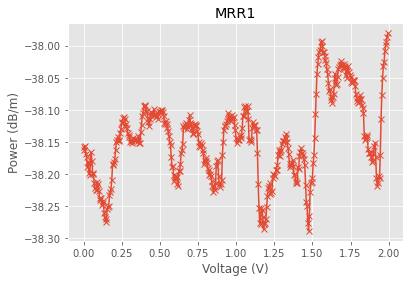

1.475


In [92]:
# Running the function to calibrate the Rings
ring = "MRR1"
voltage_range = np.arange(0,2,0.005)
h.set_many_phases(ring_config[ring])
results = Ring_Cal(voltage_range, ring, PMc)

key_min = min(results.keys(), key=(lambda k: results[k]))
print(key_min)

### Auto Ring Calibration

In [ ]:
Ring_volts = auto_Ring_cal(Ring_Volts)

## Max Power 3 Chips

In [4]:
Bob_phase_max_pow = {
    #Bob
    "Atta1":pi,
    "Atta2":pi,
    "Atta3":pi,
    "Atta4":0,
    "MZIa1":pi,
    "MZIa2":pi,
    "MZIa3":pi,
    "MZIa4":pi
    ,
    }

Charlie_phase_max_pow = {
    #Charlie
    "Attb1":pi,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":pi,
    "MZIb1":pi,
    "MZIb2":pi,
    "MZIb3":pi,
    "MZIb4":pi
    }

h.set_many_phases(Bob_phase_max_pow)
h.set_many_phases(Charlie_phase_max_pow)

In [88]:
Charlie_phase_max_pow = {
    #Charlie
    "Attb1":pi,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":pi,
    "MZIb1":pi,
    "MZIb2":pi,
    "MZIb3":pi,
    "MZIb4":pi
    }
h.set_many_phases(Charlie_phase_max_pow)

In [17]:
# Alice Idenity
h.set_many_phases({"BS1":pi/2+0.3, #0.3
    "BS2":pi/2+0.8, #-0.23
    "BS3":pi/2+0.75, #0.75
    "WDM1":0,
    "WDM2":0,
    "WDM3":0,
    "WDM4":0,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":pi})

In [6]:
# Alice
h.set_many_phases({"BS1":0, #0.3
    "BS2":0-1, #-0.23
    "BS3":pi, #0.75
    "WDM1":pi/2,
    "WDM2":pi/2,
    "WDM3":pi/2,
    "WDM4":pi/2,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":pi,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":pi,
    "Ctr_2":pi})

In [5]:
#Bob
h.set_many_phases({"Atta1":pi,
    "Atta2":pi,
    "Atta3":pi,
    "Atta4":pi,
    "MZIa1":pi,
    "MZIa2":pi,
    "MZIa3":pi,
    "MZIa4":pi,
    "Pha1":0,
    "Pha2":0,
    "Pha3":0,
    "Pha4":0})


#red = Bob OUT1
#pink = Bob OUT2
#grey = Bob OUT3
#khaki = Bob OUT4

In [14]:
#Charlie
h.set_many_phases({"Attb1":pi,
    "Attb2":pi,
    "Attb3":pi,
    "Attb4":pi,
    "MZIb1":pi,
    "MZIb2":pi,
    "MZIb3":pi,
    "MZIb4":pi})

In [20]:
h.set_voltage("Phb6",1)

# Ring Calibration Results

In [8]:
class FSR():
    
    def set_wavelength_range(self,min_lam, max_lam, reso):
        self.min_lam = min_lam
        self.max_lam = max_lam
        self.reso = reso
        return True
    
    @property
    def wavelength_range(self):
        return np.arange(self.min_lam, self.max_lam, self.reso)
    
    def plot(self, x,y):
        plt.figure(figsize=(15,10))
        plt.plot(x, y, marker = "x", linestyle=None)
        return True
    
    def set_PM(self, PM):
        self.PM = PM
        return True
    
    def measure(self):
        power_measurements = []
        for wavelength in tqdm(self.wavelength_range):
            mytunics.laser_wavelength(wavelength)
            time.sleep(0.1)
            power_measurements.append(self.PM.measure())
        self.plot(self.wavelength_range, power_measurements)
        results = dict(zip(self.wavelength_range, power_measurements))
        
        return results

In [21]:
fsr = FSR()
fsr.set_PM(PMa)
fsr.set_wavelength_range(1540, 1560, 0.01)

True

In [6]:
#Alice
h.set_many_phases({"BS1":0,
    "BS2":pi,
    "BS3":0,
    "WDM1":pi/2,
    "WDM2":pi/2,
    "WDM3":pi/2,
    "WDM4":pi/2,
    "Pre_RY1":pi,
    "Pre_RY2":pi,
    "Bell1":pi,
    "Bell2":pi,
    "Prj_RY1":0,
    "Prj_RY2":pi,
    "Prj_RY3":pi,
    "Prj_RY4":pi,
    "Ctr_1":0,
    "Ctr_2":0})

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:30<00:00,  9.49it/s]


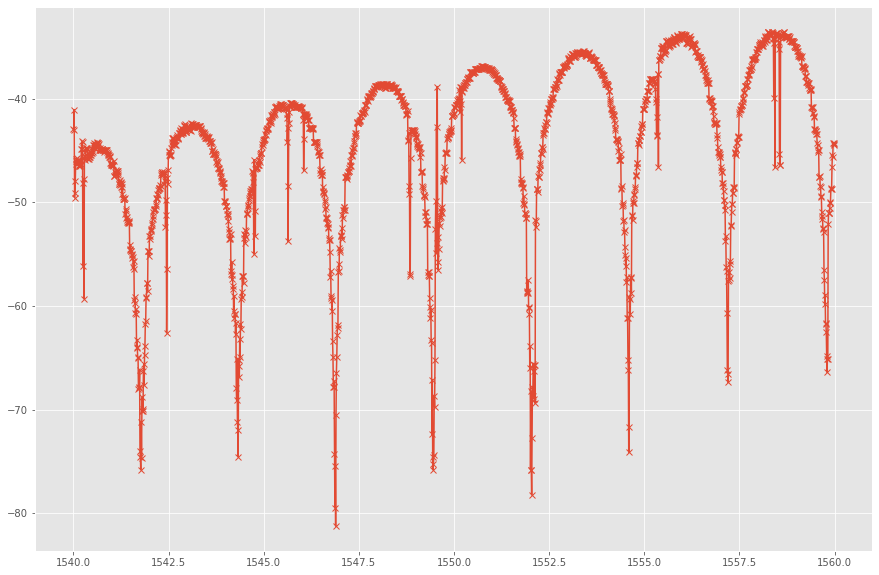

In [25]:
result = fsr.measure()

In [14]:
import os
import csv

In [26]:
with open(os.path.join("results", "FSR_MMR4.csv"), 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, result.keys())
    w.writeheader()
    w.writerow(result)

In [ ]:
class Rings(

    h
    ):
    
    import time
    from tqdm import tqdm
    
    
    def __init__(self):
        self.h = h 
        
    def plot(voltage_range, power_measurements):
        plt.plot(voltage_range, power_measurements, marker = "x", linestyle=None)
        plt.xlabel("Voltage (V)")
        plt.ylabel("Power (dB/m)")
        plt.title(ring)
        plt.show()

    def Ring_Cal(voltage_range, ring, PM):
        power_measurements = []
        for voltage in self.tqdm(voltage_range):
            h.set_voltage(ring,voltage)
            time.sleep(0.2)
            power_measurements.append(PM.measure())
        self.plot(voltage_range, power_measurements)
        dictionary = dict(zip(voltage_range, power_measurements))
        return dictionary 
    
    def laser_on():
        self.mytunics.laser_wavelength(p_wavelength)
        self.mytunics.laser_switch('on') 
        self.mytunics.laser_power(0) 
        return True

    def auto_Ring_cal(Ring_volts, PMs):
        new_ring_volts = {}
        self.laser_on()
        for ring_name, ring_voltage in Ring_volts.items(): 
            h.set_many_phases(ring_config[ring_name])
            time.sleep(0.5)
            voltage_range = np.arange(ring_voltage - 0.5, ring_voltage  +0.5, 0.002)
            results = Ring_Cal(voltage_range, ring_name, PMs[ring_name])
            new_ring_volts[ring_name] = min(results.keys(), key=(lambda k: results[k]))

        Save_to_CSV(results, filename)
        return new_ring_volts
    
    def Save_to_CSV(results, filename):
    with open(filename, 'w') as f:  # Just use 'w' mode in 3.x
        w = csv.DictWriter(f, results.keys())
        w.writeheader()
        w.writerow(results)


# Measurements